In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 导入数据与预处理

### ERα_activity 

In [2]:
era = pd.read_excel('ERα_activity.xlsx')
era.head()

,SMILES,IC50_nM,pIC50
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,2.5,8.602060
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,7.5,8.124939
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,3.1,8.508638
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,3.9,8.408935
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,7.4,8.130768


In [3]:
erat = era.drop(columns=['SMILES'])
erapi = era['pIC50']
erapi.head()

0    8.602060
1    8.124939
2    8.508638
3    8.408935
4    8.130768
Name: pIC50, dtype: float64

In [4]:
era.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SMILES   1974 non-null   object 
 1   IC50_nM  1974 non-null   float64
 2   pIC50    1974 non-null   float64
dtypes: float64(2), object(1)
memory usage: 46.4+ KB


In [5]:
era.describe()

,IC50_nM,pIC50
count,1.974000e+03,1974.000000
mean,9.910490e+03,6.586112
std,1.055204e+05,1.423023
min,4.600000e-02,2.455932
25%,2.702500e+01,5.382154
50%,2.625000e+02,6.580871
75%,4.148125e+03,7.568235
max,3.500000e+06,10.337242


In [6]:
print('ERα_activity.xlsx 数据集中异常值个数为{}'.format(era.isnull().any().sum()))

ERα_activity.xlsx 数据集中异常值个数为0


### Molecular_Descriptor

In [7]:
mol = pd.read_excel('Molecular_Descriptor.xlsx')

In [8]:
mol.head()

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,439.218115,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,467.249415,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,463.181729,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,467.249415,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,461.202465,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174


In [9]:
molt = mol.drop(columns=['SMILES'])

In [11]:
molt.info(),molt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Columns: 729 entries, nAcid to Zagreb
dtypes: float64(359), int64(370)
memory usage: 11.0 MB


(None,
              nAcid        ALogP        ALogp2          AMR         apol  \
 count  1974.000000  1974.000000  1.974000e+03  1974.000000  1974.000000   
 mean      0.108409     1.110164  3.288495e+00   116.557106    60.626471   
 std       0.347900     1.434250  1.283292e+01    31.567455    19.449748   
 min       0.000000   -23.105000  3.600000e-07    54.067000    30.661930   
 25%       0.000000     0.376300  4.052598e-01    88.303700    44.432102   
 50%       0.000000     1.170950  1.560251e+00   114.837500    59.901376   
 75%       0.000000     1.948100  4.018823e+00   141.423650    74.421376   
 max       4.000000     5.181700  5.338410e+02   517.429400   359.662740   
 
         naAromAtom    nAromBond        nAtom   nHeavyAtom           nH  ...  \
 count  1974.000000  1974.000000  1974.000000  1974.000000  1974.000000  ...   
 mean     15.446809    16.189463    50.761905    28.112462    22.649443  ...   
 std       5.155854     5.635271    18.089182     8.073881    10.77

In [12]:
print('Molecular_Descriptor.xlsx 数据集中异常值个数为{}'.format(molt.isnull().any().sum()))

Molecular_Descriptor.xlsx 数据集中异常值个数为0


## 特征选择

In [18]:
# 相关性算法：灰色关联、皮尔逊、秩相关、肯德尔、余弦、典型相关分析、Elasticsearch相关性
fX = molt.values
fy = erapi.values
fX.shape,fy.shape

((1974, 729), (1974,))

In [14]:
# remove features with low variance
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit(fX)
print('features whose variance equal to 0:')
sel_vars = sel.variances_
n_zero_var = 0
for i in range(len(sel_vars)):
    if sel_vars[i] == 0:
        print('{} '.format(molt.columns[i]),end=' ')
        n_zero_var += 1
print('\n\nnumber of zero variance feature: ',n_zero_var)

features whose variance equal to 0:
nB  nBondsQ  nHsNH3p  nHssNH2p  nHsssNHp  nHmisc  nsLi  nssBe  nssssBem  nsBH2  nssBH  nsssB  nssssBm  nddC  nsNH3p  nssNH2p  nsssNHp  nddsN  naOm  nsSiH3  nssSiH2  nsssSiH  nssssSi  nsPH2  nssPH  nsssP  nddsP  nsssssP  nssssssS  nSm  nsGeH3  nssGeH2  nsssGeH  nssssGe  nsAsH2  nssAsH  nsssAs  ndsssAs  nddsAs  nsssssAs  nsSeH  ndSe  nssSe  naaSe  ndssSe  nssssssSe  nddssSe  nsSnH3  nssSnH2  nsssSnH  nssssSn  nsPbH3  nssPbH2  nsssPbH  nssssPb  SHsNH3p  SHssNH2p  SHsssNHp  SHmisc  SsLi  SssBe  SssssBem  SsBH2  SssBH  SsssB  SssssBm  SddC  SsNH3p  SssNH2p  SsssNHp  SddsN  SaOm  SsSiH3  SssSiH2  SsssSiH  SssssSi  SsPH2  SssPH  SsssP  SddsP  SsssssP  SssssssS  SSm  SsGeH3  SssGeH2  SsssGeH  SssssGe  SsAsH2  SssAsH  SsssAs  SdsssAs  SddsAs  SsssssAs  SsSeH  SdSe  SssSe  SaaSe  SdssSe  SssssssSe  SddssSe  SsSnH3  SssSnH2  SsssSnH  SssssSn  SsPbH3  SssPbH2  SsssPbH  SssssPb  minHsNH3p  minHssNH2p  minHsssNHp  minHmisc  minsLi  minssBe  minssssBem  minsBH2  mi

In [15]:
# information gain
from sklearn.feature_selection import mutual_info_regression
mu_imp = mutual_info_regression(molt.values,erapi.values)
fea_imp = pd.Series(mu_imp,index=molt.columns)
fea_imp.sort_values(ascending=False)[:20]
# fea_imp.plot(kind='barh',color='teal')

SsOH        0.372421
BCUTc-1l    0.360704
BCUTc-1h    0.345784
maxHsOH     0.344566
SHsOH       0.335760
minHsOH     0.321582
maxsOH      0.306191
WTPT-3      0.304116
minHBa      0.301623
maxssO      0.290620
SssO        0.290616
WTPT-5      0.288463
minsOH      0.285684
MDEC-23     0.283046
minwHBa     0.280190
MLFER_A     0.277779
SaaCH       0.273449
minaasC     0.272453
maxHBa      0.270284
SHBd        0.269382
dtype: float64

In [17]:
# fisher score
from skfeature.function.similarity_based import fisher_score
fish_rank = fisher_score.fisher_score(fX,fy)
fea_imp = pd.Series(fish_rank, index=molt.columns)
fea_imp.sort_values(ascending=False)[:20]

/Users/johnson/opt/anaconda3/lib/python3.8/site-packages/skfeature/function/similarity_based/fisher_score.py:59: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0 / lap_score - 1


minaaSe        728
minssCH2       727
nI             726
nHsSH          725
nSm            724
nHaaNH         723
naasC          722
SHsNH3p        721
nssSiH2        720
SsF            719
maxssssssSe    718
nHsOH          717
nHBint8        716
SddssSe        715
VPC-5          714
nC             713
maxHBint7      712
VP-7           711
SsPH2          710
ATSc2          709
dtype: int64

In [128]:
# select top-20 best model from f_regression
from sklearn.feature_selection import f_regression
f_score = f_regression(fX,fy)[1]
f_best = SelectKBest(f_regression, k=20).fit_transform(fX,fy)
f_score_sorted = np.argsort(f_score)
molt.columns[f_score_sorted[:20]]
# np.sort(f_score[1],)

/Users/johnson/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/johnson/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Index(['MDEC-23', 'MLogP', 'LipoaffinityIndex', 'maxsOH', 'minsOH', 'nC',
       'nT6Ring', 'n6Ring', 'minsssN', 'BCUTp-1h', 'C2SP2', 'hmin', 'AMR',
       'SwHBa', 'maxsssN', 'MDEC-22', 'SP-5', 'SaaCH', 'CrippenLogP',
       'maxHsOH'],
      dtype='object')

In [17]:
# lasso selection model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
# try different alpha values
lasso_ = Lasso(alpha=0.6).fit(fX,fy)
lasso_coefs = (lasso_.coef_*100).tolist()
las_col = [i for i in range(len(lasso_coefs)) if lasso_coefs[i] != 0]
len(las_col),molt.columns[las_col]

/Users/johnson/opt/anaconda3/envs/prac/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.3765820039396, tolerance: 0.39953155744665325
  model = cd_fast.enet_coordinate_descent(


(20,
 Index(['ATSp1', 'ATSp2', 'ATSp3', 'ATSp4', 'ATSp5', 'BCUTw-1h', 'ECCEN',
        'SHBa', 'SHBint8', 'SsOH', 'SdO', 'SsF', 'mindO', 'maxsOH', 'fragC',
        'MDEC-23', 'TopoPSA', 'VABC', 'MW', 'WPATH'],
       dtype='object'))

In [ ]:
# randomforest selection
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=2, max_depth=4)
rf_scores = []
# select individual feature and do cross-validation
for i in range(fX.shape[1]):
    score = cross_val_score(rf,fX[:, i:i+1], fy, scoring="r2", 
                            cv=ShuffleSplit(len(fX), test_size=0.3))
    rf_scores.append((format(np.mean(score), '.3f'), molt.columns[i]))
print(sorted(rf_scores, reverse=True))

In [175]:
# forward feature selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

lor = LogisticRegression()
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, 
                                n_features_to_select=20, 
                                direction='forward',
                                scoring='neg_mean_squared_error',
                                cv=5)
sfs.fit(fX,fy)
sfs_sup = sfs.get_support()
fea_sfs_lr = [i for i in range(len(sfs_sup)) if sfs_sup[i]]
molt.columns[fea_sfs_lr]

Index(['ATSc4', 'BCUTc-1l', 'BCUTp-1h', 'C1SP2', 'C3SP2', 'VC-6', 'SHCsats',
       'mindsCH', 'minsssN', 'minsOH', 'mindO', 'maxHBd', 'maxHBint8',
       'maxsssCH', 'MAXDP2', 'ETA_dEpsilon_D', 'MDEC-23', 'MDEC-24', 'MLFER_A',
       'WTPT-5'],
      dtype='object')

In [ ]:
# backward feature selection (occupy much cpu resource)
sfs = SequentialFeatureSelector(lr, 
                                n_features_to_select=1, 
                                direction='backward',
                                scoring='neg_mean_squared_error',
                                cv=5)
sfs.fit(fX,fy)
sfs_sup = sfs.get_support()
fea_sfs_lr = [i for i in range(len(sfs_sup)) if sfs_sup[i]]
molt.columns[fea_sfs_lr]

### 相关性矩阵

In [94]:
# correlation coefficient (pearman)
molt_corr = molt.corr()
molt_corr
#sns.heatmap(mol_corr, center=0, annot=True, cmap='YlGnBu') # take too much time

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
nAcid,1.000000,0.243518,0.091095,0.121448,0.060198,0.134609,0.116454,0.043003,0.121425,-0.018790,...,0.114178,0.114287,-0.112722,0.116382,0.120627,0.004035,0.014814,0.107746,0.004302,0.118274
ALogP,0.243518,1.000000,-0.255028,-0.074840,-0.250839,0.372740,0.357599,-0.308651,-0.222162,-0.351681,...,-0.240888,-0.205436,0.085229,-0.415552,-0.316737,-0.424806,-0.449348,-0.167517,0.186738,-0.171981
ALogp2,0.091095,-0.255028,1.000000,0.378497,0.429697,-0.032440,-0.034642,0.444176,0.469659,0.393746,...,0.489044,0.441499,-0.140236,0.535852,0.224825,0.520573,0.935940,0.393896,-0.004351,0.408290
AMR,0.121448,-0.074840,0.378497,1.000000,0.958476,0.517958,0.451325,0.920754,0.972396,0.817102,...,0.948124,0.977560,0.234581,0.546936,0.436380,0.391155,0.544759,0.907052,0.349198,0.963613
apol,0.060198,-0.250839,0.429697,0.958476,1.000000,0.294009,0.230697,0.992330,0.968538,0.940150,...,0.945403,0.967090,0.158927,0.528375,0.403285,0.426970,0.609934,0.910283,0.417346,0.946580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WTPT-5,0.004035,-0.424806,0.520573,0.391155,0.426970,0.064511,0.075692,0.434538,0.473202,0.374912,...,0.493880,0.456155,-0.025577,0.751433,-0.001536,1.000000,0.597059,0.349148,-0.198666,0.420492
WPATH,0.014814,-0.449348,0.935940,0.544759,0.609934,0.030939,0.018690,0.623473,0.642264,0.565408,...,0.657014,0.618856,-0.061697,0.649472,0.361278,0.597059,1.000000,0.551611,0.010922,0.582261
WPOL,0.107746,-0.167517,0.393896,0.907052,0.910283,0.316222,0.257757,0.890376,0.935823,0.793509,...,0.905838,0.942272,0.287110,0.541695,0.495769,0.349148,0.551611,1.000000,0.282610,0.967832
XLogP,0.004302,0.186738,-0.004351,0.349198,0.417346,0.096453,0.077495,0.427641,0.289006,0.501350,...,0.259598,0.290884,0.010232,-0.293713,-0.220903,-0.198666,0.010922,0.282610,1.000000,0.268606


In [96]:
# correlation coefficient (spearman)
spearman_corr = molt.corr(method='spearman')
spearman_corr

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
nAcid,1.000000,0.298464,0.294498,0.127125,0.087442,0.148992,0.128085,0.071150,0.142736,0.011872,...,0.137757,0.130279,-0.190618,0.097911,0.099315,-0.081729,0.123396,0.149544,0.072792,0.138795
ALogP,0.298464,1.000000,0.839721,0.154591,0.044144,0.352324,0.365084,-0.000730,0.060073,-0.060433,...,0.054366,0.053615,-0.039049,-0.173593,-0.232812,-0.144005,0.043113,0.063338,0.325502,0.060326
ALogp2,0.294498,0.839721,1.000000,0.206210,0.131773,0.258400,0.267773,0.095173,0.142974,0.044380,...,0.136171,0.134108,-0.121343,-0.111207,-0.177669,-0.106748,0.129674,0.138409,0.341661,0.135492
AMR,0.127125,0.154591,0.206210,1.000000,0.961691,0.661600,0.589020,0.926123,0.970967,0.804414,...,0.946192,0.971228,0.326233,0.455455,0.353602,0.304766,0.967399,0.892645,0.448692,0.951214
apol,0.087442,0.044144,0.131773,0.961691,1.000000,0.504649,0.425076,0.990971,0.959475,0.921645,...,0.926193,0.959164,0.318972,0.372514,0.314274,0.272351,0.952547,0.906731,0.510868,0.942748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WTPT-5,-0.081729,-0.144005,-0.106748,0.304766,0.272351,0.218260,0.186234,0.257380,0.320081,0.194506,...,0.317963,0.324961,0.193800,0.537170,-0.169968,1.000000,0.337279,0.221481,-0.129881,0.310909
WPATH,0.123396,0.043113,0.129674,0.967399,0.952547,0.600290,0.525283,0.925527,0.992083,0.790220,...,0.963684,0.988957,0.275921,0.557568,0.434226,0.337279,1.000000,0.894391,0.390364,0.963631
WPOL,0.149544,0.063338,0.138409,0.892645,0.906731,0.494950,0.424504,0.889545,0.933442,0.775660,...,0.895049,0.935278,0.379534,0.431551,0.400694,0.221481,0.894391,1.000000,0.403700,0.963937
XLogP,0.072792,0.325502,0.341661,0.448692,0.510868,0.245372,0.222946,0.523117,0.407307,0.573974,...,0.376626,0.405263,0.120929,-0.262242,-0.213624,-0.129881,0.390364,0.403700,1.000000,0.391971


In [97]:
# correlation coefficient (kendall)
kendall_corr = molt.corr(method='kendall')
kendall_corr

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
nAcid,1.000000,0.242783,0.239308,0.103679,0.070950,0.129485,0.111825,0.058070,0.118812,0.009540,...,0.112130,0.106104,-0.155087,0.079962,0.080965,-0.068858,0.100843,0.122865,0.059352,0.113894
ALogP,0.242783,1.000000,0.800777,0.104208,0.029251,0.256064,0.265423,-0.001069,0.039567,-0.040007,...,0.035734,0.033492,-0.027091,-0.119642,-0.159800,-0.100206,0.027791,0.043853,0.239648,0.038789
ALogp2,0.239308,0.800777,1.000000,0.139862,0.088510,0.184618,0.190595,0.064099,0.097983,0.030823,...,0.091522,0.089362,-0.081343,-0.075785,-0.121808,-0.073275,0.087044,0.094168,0.241571,0.091182
AMR,0.103679,0.104208,0.139862,1.000000,0.835812,0.490678,0.431714,0.771647,0.871426,0.621016,...,0.800550,0.854597,0.205474,0.300201,0.230297,0.205596,0.845297,0.714778,0.307279,0.813880
apol,0.070950,0.029251,0.088510,0.835812,1.000000,0.354810,0.296287,0.926632,0.840703,0.773307,...,0.761887,0.822565,0.197623,0.238207,0.205076,0.180931,0.809873,0.734949,0.355090,0.796440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WTPT-5,-0.068858,-0.100206,-0.073275,0.205596,0.180931,0.168191,0.142109,0.170822,0.222075,0.125817,...,0.214689,0.222229,0.136613,0.402025,-0.113066,1.000000,0.229960,0.153707,-0.085784,0.213509
WPATH,0.100843,0.027791,0.087044,0.845297,0.809873,0.441428,0.381919,0.767337,0.941372,0.601528,...,0.854642,0.915303,0.170777,0.378931,0.291625,0.229960,1.000000,0.719380,0.265544,0.843313
WPOL,0.122865,0.043853,0.094168,0.714778,0.734949,0.351255,0.300929,0.717194,0.801019,0.583985,...,0.724153,0.785944,0.237359,0.291153,0.276267,0.153707,0.719380,1.000000,0.275451,0.850838
XLogP,0.059352,0.239648,0.241571,0.307279,0.355090,0.183698,0.168445,0.367608,0.283680,0.411826,...,0.255766,0.275068,0.080206,-0.177151,-0.140735,-0.085784,0.265544,0.275451,1.000000,0.266976


In [95]:
# Covariance matrix
molt_cov = np.cov(molt.to_numpy())
molt_cov
# sns.heatmap(mol_cov, annot=True, vmax=1, square=True, cmap='Blues')

array([[118043.84040595, 132675.53620674, 123165.46845493, ...,
        168432.63572077, 120200.70446671, 181696.49611774],
       [132675.53620674, 149422.5935941 , 138334.66976985, ...,
        189025.41909454, 134156.56328827, 204281.71565653],
       [123165.46845493, 138334.66976985, 129197.42227975, ...,
        178227.74898609, 126552.16400376, 192139.16268217],
       ...,
       [168432.63572077, 189025.41909454, 178227.74898609, ...,
        251070.73394881, 174430.99356219, 271211.42337528],
       [120200.70446671, 134156.56328827, 126552.16400376, ...,
        174430.99356219, 128338.30441966, 186245.99663628],
       [181696.49611774, 204281.71565653, 192139.16268217, ...,
        271211.42337528, 186245.99663628, 293819.10821334]])

In [ ]:
# chi-square test (normally for categorical variable)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## 回归模型选择

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

fea_selected = molt.columns[las_col]
srcX = molt[fea_selected]
srcy = fy
X_train, X_test, y_train, y_test = train_test_split(srcX, srcy,test_size=0.3,shuffle=True)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((1381, 20), (593, 20), (1381,), (593,))

In [207]:
# random forest
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=100, random_state=0)
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_test)

# evaluate
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5848705004194139
Mean Squared Error: 0.6308633025713897
Root Mean Squared Error: 0.7942690366440012


In [129]:
# AdaBoost regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

adareg = AdaBoostRegressor(n_estimators=100,random_state=0,loss='linear')
adareg.fit(X_train,y_train)
y_pred = adareg.predict(X_test)
ada_mse = mean_squared_error(y_test, y_pred)
print("AdaBoost mean square error = ", ada_mse)

AdaBoost mean square error =  0.235095788356441


In [141]:
# neural network (perceptron)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# hidden_layer_sizes can be adjusted a lot
mlpreg = MLPRegressor(
        hidden_layer_sizes=(100,50,1), activation='relu',solver='adam',
        alpha=0.01,max_iter=200,random_state=60)
mlpreg.fit(X_train, y_train)
mlpreg
train_pred = mlpreg.predict(X_train)
test_pred = mlpreg.predict(X_test)

mse_train = mean_squared_error(y_train,train_pred)
print ("MLP Train ERROR = ", mse_train)
mse_test = mean_squared_error(y_test,test_pred)
print ("MLP Test ERROR = ", mse_test)

MLP Train ERROR =  0.23979818385963453
MLP Test ERROR =  0.236549654654813


## 分类模型选择

### 导入数据并划分

In [14]:
adm = pd.read_excel('ADMET.xlsx')
adm.head(),adm.info(), adm.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SMILES  1974 non-null   object
 1   Caco-2  1974 non-null   int64 
 2   CYP3A4  1974 non-null   int64 
 3   hERG    1974 non-null   int64 
 4   HOB     1974 non-null   int64 
 5   MN      1974 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 92.7+ KB


(                                              SMILES  Caco-2  CYP3A4  hERG  \
 0  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...       0       1     1   
 1  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...       0       1     1   
 2  Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...       0       1     1   
 3  Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...       0       1     1   
 4  Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...       0       1     1   
 
    HOB  MN  
 0    0   0  
 1    0   0  
 2    0   1  
 3    0   0  
 4    0   0  ,
 None,
             Caco-2       CYP3A4         hERG          HOB           MN
 count  1974.000000  1974.000000  1974.000000  1974.000000  1974.000000
 mean      0.384498     0.740122     0.556738     0.257852     0.766971
 std       0.486600     0.438679     0.496896     0.437563     0.422868
 min       0.000000     0.000000     0.000000     0.000000     0.000000
 25%       0.000000     0.000000     0.000000     0.000000     1.000000


In [15]:
# Xgboost、受限玻尔兹曼机(RBM)[DBN神经网络中的核心]、多层感知MLP、自组织映射SOM、lightBM
admt = adm.drop(columns=['SMILES'])
caco = admt['Caco-2']
cyp = admt['CYP3A4']
her = admt['hERG']
hob = admt['HOB']
mn = admt['MN']

### 单独标签进行分类

#### Caco-2

In [16]:
# imbalanced value detection
caco.value_counts()

0    1215
1     759
Name: Caco-2, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

ssc = StandardScaler()
trans_X = ssc.fit_transform(fX)

X_train, X_test, y_train, y_test = train_test_split(fX, caco.values, test_size=0.25)
X_train_tran, X_test_tran, y_train, y_test = train_test_split(fX, caco.values, test_size=0.25)
X_train.shape,y_train.shape,X_test.shape,y_test.shape, X_train_tran.shape, X_test_tran.shape

((1480, 729), (1480,), (494, 729), (494,), (1480, 729), (494, 729))

In [73]:
# XGBoost
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train) 
dtest=xgb.DMatrix(X_test)

params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':4,
    'lambda': 1,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta': 0.025,
    'seed':0,
    'nthread':8,
     'silent':0}

watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=20,evals=watchlist)
#输出概率
ypred=bst.predict(dtest)

# 设置阈值, 输出一些评价指标，选择概率大于0.5的为1，其他为0类
y_pred = (ypred >= 0.5)*1

from sklearn import metrics
print ('AUC: %.4f' % metrics.roc_auc_score(y_test,ypred))
print ('ACC: %.4f' % metrics.accuracy_score(y_test,y_pred))
print ('Precesion: %.4f' %metrics.precision_score(y_test,y_pred))
print ('Recall: %.4f' % metrics.recall_score(y_test,y_pred))
print ('F1-score: %.4f' %metrics.f1_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

[01:33:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.62669
[1]	train-auc:0.68675
[2]	train-auc:0.70339
[3]	train-auc:0.72396
[4]	train-auc:0.74380
[5]	train-auc:0.76422
[6]	train-auc:0.77462
[7]	train-auc:0.78342
[8]	train-auc:0.78943
[9]	train-auc:0.79124
[10]	train-auc:0.79814
[11]	train-auc:0.80385
[12]	train-auc:0.80731
[13]	train-auc:0.81195
[14]	train-auc:0.81293
[15]	train-auc:0.81446
[16]	train-auc:0.81738
[17]	train-auc:0.81595
[18]	train-auc:0.81675
[19]	train-auc:0.81659
AUC: 0.4663
ACC: 0.5587
Precesion: 0.3148
Recall: 0.0859
F1-score: 0.1349
[[259  37]
 [181  17]]


In [72]:
# LightGBM
import lightgbm as lgb
dtrain = lgb.Dataset(X_train, label=y_train) 
dtest=lgb.Dataset(X_test,label=y_test)

params = {'num_leaves': 60,
          'min_data_in_leaf': 30,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.03,
          "min_sum_hessian_in_leaf": 6,
          "boosting": "gbdt",
          "feature_fraction": 0.9,
          "bagging_freq": 1,
          "bagging_fraction": 0.8,
          "bagging_seed": 11,
          "lambda_l1": 0,
          # 'lambda_l2': 0.001,
          "verbosity": -1,
          "nthread": -1,
          'metric': {'binary_logloss', 'auc'},
          "random_state": 2021,
          # 'device': 'gpu'
          }

gbm = lgb.train(params,
                dtrain,
                num_boost_round=100,
                valid_sets=dtest,
                early_stopping_rounds=50)
#输出概率
ypred=gbm.predict(X_test)

# 设置阈值, 输出一些评价指标，选择概率大于0.5的为1，其他为0类
y_pred = (ypred >= 0.5)*1

print ('AUC: %.4f' % metrics.roc_auc_score(y_test,ypred))
print ('ACC: %.4f' % metrics.accuracy_score(y_test,y_pred))
print ('Precesion: %.4f' %metrics.precision_score(y_test,y_pred))
print ('Recall: %.4f' % metrics.recall_score(y_test,y_pred))
print ('F1-score: %.4f' %metrics.f1_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

[1]	valid_0's binary_logloss: 0.674772	valid_0's auc: 0.480216
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.676828	valid_0's auc: 0.4357
[3]	valid_0's binary_logloss: 0.67705	valid_0's auc: 0.444905
[4]	valid_0's binary_logloss: 0.677819	valid_0's auc: 0.447388
[5]	valid_0's binary_logloss: 0.678118	valid_0's auc: 0.453581
[6]	valid_0's binary_logloss: 0.678756	valid_0's auc: 0.458948
[7]	valid_0's binary_logloss: 0.680377	valid_0's auc: 0.449154
[8]	valid_0's binary_logloss: 0.681135	valid_0's auc: 0.448514
[9]	valid_0's binary_logloss: 0.681815	valid_0's auc: 0.447584
[10]	valid_0's binary_logloss: 0.68314	valid_0's auc: 0.443643
[11]	valid_0's binary_logloss: 0.684097	valid_0's auc: 0.44366
[12]	valid_0's binary_logloss: 0.685833	valid_0's auc: 0.436135
[13]	valid_0's binary_logloss: 0.686344	valid_0's auc: 0.438251
[14]	valid_0's binary_logloss: 0.686549	valid_0's auc: 0.443156
[15]	valid_0's binary_logloss: 0.688277	valid_0's auc: 0.

/Users/johnson/opt/anaconda3/envs/prac/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
ypred

array([0.38636547, 0.39200813, 0.38000899, 0.37066199, 0.3767851 ,
       0.37715305, 0.38513856, 0.38336685, 0.37715305, 0.39328145,
       0.39328145, 0.38636547, 0.38560398, 0.38093424, 0.39328145,
       0.38560398, 0.38542156, 0.37246992, 0.37360123, 0.37835915,
       0.38447852, 0.37293068, 0.38131361, 0.37263953, 0.38093424,
       0.37715305, 0.38560398, 0.38348482, 0.37324557, 0.37167884,
       0.37104067, 0.37104067, 0.38000899, 0.37360123, 0.37621786,
       0.37835915, 0.38000899, 0.38636547, 0.36873908, 0.38348482,
       0.38058363, 0.39396595, 0.38636547, 0.38000899, 0.38542156,
       0.38336685, 0.38000899, 0.37066199, 0.39328145, 0.37835915,
       0.37263953, 0.39328145, 0.38513856, 0.36870999, 0.37621786,
       0.37167884, 0.38542156, 0.37293068, 0.38131361, 0.37263953,
       0.38000899, 0.37293068, 0.38636547, 0.38542156, 0.38000899,
       0.39200813, 0.37263953, 0.37360123, 0.38636547, 0.38058363,
       0.37715305, 0.38336685, 0.37835915, 0.37545839, 0.37104

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()                                        # 实例化一个LR模型
lr.fit(X_train,y_train)                                          # 训练模型
y_prob = lr.predict_proba(X_test)[:,1]                           # 预测1类的概率
y_pred = lr.predict(X_test)                                      # 模型对测试集的预测结果
fpr_lr,tpr_lr,threshold_lr = metrics.roc_curve(y_test,y_prob)    # 获取真阳率、伪阳率、阈值
auc_lr = metrics.auc(fpr_lr,tpr_lr)                              # AUC得分
score_lr = metrics.accuracy_score(y_test,y_pred)                 # 模型准确率
print([score_lr,auc_lr])

[0.611336032388664, 0.49959233237921763]


/Users/johnson/opt/anaconda3/envs/prac/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# SVM
from sklearn.svm import SVC
from sklearn import metrics

kernelList = ['linear','rbf','sigmoid']
for kernel in kernelList:
    svc = SVC(kernel=kernel).fit(X_train,y_train)

    # decision border distance
    y_prob = svc.decision_function(X_test)
    y_pred = svc.predict(X_test)
    # false positive, true positive
    fpr_svc,tpr_svc,threshold_svc = metrics.roc_curve(y_test,y_prob)
    # auc curve
    auc_svc = metrics.auc(fpr_svc,tpr_svc)
    score_svc = metrics.accuracy_score(y_test,y_pred)
    print([score_svc,auc_svc])

[0.5323886639676113, 0.49620955850464044]
[0.6174089068825911, 0.4689912394830428]
[0.562753036437247, 0.515725561627201]


In [ ]:
# SVM with standardization
kernelList = ['linear','rbf','sigmoid']
for kernel in kernelList:
    svc = SVC(kernel=kernel).fit(X_train_tran,y_train)

    # decision border distance
    y_prob = svc.decision_function(X_test_tran)
    y_pred = svc.predict(X_test_tran)
    # false positive, true positive
    fpr_svc,tpr_svc,threshold_svc = metrics.roc_curve(y_test,y_prob)
    # auc curve
    auc_svc = metrics.auc(fpr_svc,tpr_svc)
    score_svc = metrics.accuracy_score(y_test,y_pred)
    print([score_svc,auc_svc])

In [ ]:
# param gamma tuning
score_gamma=[]
gammaList=np.logspace(-10,1,50)

for gamma in gammaList:
    svc = SVC(gamma=gamma).fit(X_train,y_train)
    score_gamma.append(svc.score(X_test,y_test))

print('gamma={}, get highest score={}'.format(gammaList[score_gamma.index(max(score_gamma))],max(score_gamma)))
# plt.plot(gammaList,score_gamma)

In [ ]:
# penalty to avoid overfitting
score_C=[]
CList=np.linspace(0.01,30,50)

for i in CList:
    svc = SVC(C=i).fit(X_train,y_train)
    score_C.append(svc.score(X_test,y_test))

print('C={}时, get highest score={}'.format(CList[score_C.index(max(score_C))],max(score_C)))
plt.plot(CList, score_C)

In [230]:
# KNN with standardization
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,weights='uniform').fit(X_train_tran,y_train)
# knn = KNeighborsClassifier(n_neighbors=5,weights='distance').fit(X_train_tran,y_train)

y_prob = knn.predict_proba(X_test_tran)[:,1]                              
y_pred = knn.predict(X_test_tran)                                       
fpr_knn,tpr_knn,threshold_knn = metrics.roc_curve(y_test,y_prob)   
auc_knn = metrics.auc(fpr_knn,tpr_knn)                              
score_knn = metrics.accuracy_score(y_test,y_pred)
print([score_knn,auc_knn])

[0.8502024291497976, 0.9184599668413913]


K=5, get highest score=0.5546558704453441


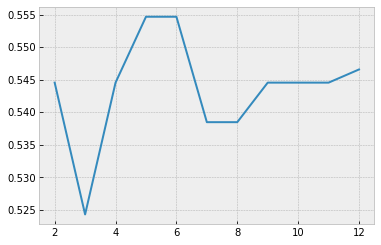

In [242]:
# select best K 
score_K=[]
KList=range(2,13)

for k in KList:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    score_K.append(knn.score(X_test,y_test))

print('K={}, get highest score={}'.format(KList[score_K.index(max(score_K))],max(score_K)))
plt.plot(KList, score_K)

In [231]:
# decision tree
from sklearn import tree

dtc = tree.DecisionTreeClassifier()                         
dtc.fit(X_train,y_train)                                       
y_prob = dtc.predict_proba(X_test)[:,1]                          
y_pred = dtc.predict(X_test)                                      
fpr_dtc,tpr_dtc,threshod_dtc= metrics.roc_curve(y_test,y_prob)   
score_dtc = metrics.accuracy_score(y_test,y_pred)                
auc_dtc = metrics.auc(fpr_dtc,tpr_dtc) 
print([score_dtc,auc_dtc])

[0.5344129554655871, 0.524014871133589]


In [232]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()                                     
rfc.fit(X_train,y_train)                                           
y_prob = rfc.predict_proba(X_test)[:,1]                           
fpr_rfc,tpr_rfc,threshold_rfc = metrics.roc_curve(y_test,y_prob)    
auc_rfc = metrics.auc(fpr_rfc,tpr_rfc)                             
score_rfc = metrics.accuracy_score(y_test,y_pred)                
print([score_rfc,auc_rfc])

[0.5526315789473685, 0.501758411066267]


In [234]:
# random forest classifier with standardization
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)                                     
rfc.fit(X_train_tran,y_train)                                           
y_prob = rfc.predict_proba(X_test_tran)[:,1]                           
fpr_rfc,tpr_rfc,threshold_rfc = metrics.roc_curve(y_test,y_prob)    
auc_rfc = metrics.auc(fpr_rfc,tpr_rfc)                             
score_rfc = metrics.accuracy_score(y_test,y_pred)                
print([score_rfc,auc_rfc])

[0.5526315789473685, 0.9557717749903706]


In [38]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# use weak classifier
adaclf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
#     RandomForestClassifier(max_depth=1),
    n_estimators=100
)
adaclf.fit(X_train, y_train)
y_pred = adaclf.predict(X_test)
# print('adaboost confusion matrix:')
conf_mat = confusion_matrix(y_test, y_pred)
fpr_ada,tpr_ada,threshold_ada = metrics.roc_curve(y_test,y_pred)    
auc_ada = metrics.auc(fpr_ada,tpr_ada)                             
score_ada = metrics.accuracy_score(y_test,y_pred)  
print('[{},{}]'.format(score_ada,auc_ada))


[0.5890688259109311,0.5079607434734259]


In [142]:
# comparison between different approaches
plt.style.use('bmh')
plt.figure(figsize=(13,10))

plt.plot(fpr_lr,tpr_lr,label='lr')                             
plt.plot(fpr_svc,tpr_svc,label='svc')                          
plt.plot(fpr_knn,tpr_knn,label='knn')                         
plt.plot(fpr_dtc,tpr_dtc,label='dtc')                          
plt.plot(fpr_rfc,tpr_rfc,label='rfc')                 
plt.plot(fpr_ada,tpr_ada,label='ada')                 

plt.legend(loc='lower right',prop={'size':25})
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.show()

NameError: name 'fpr_lr' is not defined

<Figure size 936x720 with 0 Axes>

In [74]:
x1 = torch.rand(4,4)
x1 = torch.reshape(x1,(x1.shape[0],1,-1))
t_conv1d = Conv1d(1,3,2,stride=1)
t_fc = Linear(3 * 3, 1)
t_x1 = t_conv1d(x1)
ff = Flatten()
t_x2 = t_fc(ff(t_x1))
t_x1.shape,t_x2.shape

(torch.Size([4, 3, 3]), torch.Size([4, 1]))

In [122]:
# NN model definition
import torch
from torch.nn import Module,Linear,Conv1d,Conv2d,Sequential,Sigmoid,ReLU,MaxPool1d,MaxPool2d,Flatten
from torch.nn import MSELoss,BCEWithLogitsLoss
from torch.optim import SGD,Adam

# 729 feature
class Linear_m(Module):
    def __init__(self, D_in, H1,H2,H3):
        super(Linear_m,self).__init__()
        self.layer1 = Sequential(Linear(D_in,H1),ReLU())
        self.layer2 = Sequential(Linear(H1,H2),ReLU())
        self.layer3 = Sequential(Linear(H2,H3),ReLU())
        self.outlayer = Sequential(Linear(H3,1),Sigmoid())
    def forward(self,X):
        X = self.layer1(X)
        X = self.layer2(X)
        X = self.layer3(X)
        X = self.outlayer(X)
        return X

class Conv1d_m(Module):
    def __init__(self):
        super(Conv1d_m,self).__init__()
        self.conv1 = Sequential(Conv1d(1,10,3, stride=1),ReLU())
        self.conv2 = Sequential(Conv1d(10,15,3, stride=1),ReLU())
        self.flatten = Flatten()
        self.fc = Linear(725*15,1)
        self.sigmoid = Sigmoid()
    
    def forward(self,X):
        X = self.conv1(X)
        X = self.conv2(X)
        X = self.flatten(X)
        X = self.fc(X)
        X = self.sigmoid(X)
        return X

# class Conv2d_m(Module):
#     def __init__(self):
#         super(Conv2d_m,self).__init__()
#         self.conv1 = Sequential(Conv2d(1,5,3), ReLU())
#         self.conv2 = Sequential(Conv2d(5,8,3), ReLU())
#         self.maxpool = MaxPool2d(2,stride=2)
#         self.flatten = Flatten()
#         self.outlayer = Sequential(Linear(1,1),Sigmoid())
    
#     def forward(self, X):
#         X = self.conv1(X)
#         X = self.conv2(X)
#         X = self.maxpool(X)
#         X = self.flatten(X)
#         X = self.outlayer(X)
#         return X

In [126]:
# linear model
X_train_l = torch.Tensor(X_train)
X_test_l = torch.Tensor(X_test)
y_train_l = torch.Tensor(y_train)
y_train_l = y_train_l.unsqueeze(1)

model_l = Linear_m(729,200,100,50)
model_l.train()
criterion = BCEWithLogitsLoss() # binary classification
optimizer = Adam(model_l.parameters(), lr=1e-3)
for t in range(50):
    y_pred = model_l(X_train_l)

    loss = criterion(y_pred, y_train_l)
    y_pred= y_pred > 0.5
    accuracy = (y_pred==y_train_l).sum().float() / len(y_pred)
    
    if t % 10 == 0:
        print(t, loss.item(), accuracy.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 0.9227142333984375 0.39054054021835327
10 0.6931473016738892 0.6094594597816467
20 0.6931473016738892 0.6094594597816467
30 0.6931473016738892 0.6094594597816467
40 0.6931473016738892 0.6094594597816467


In [109]:
# Conv1d model
X_train_c1 = torch.Tensor(X_train)
X_train_c1 = X_train_c1.reshape(X_train_c1.shape[0],1,-1)
X_test_c1 = torch.Tensor(X_test)
X_test_c1 = X_test_c1.reshape(X_test_c1.shape[0],1,-1)
y_train_c1 = torch.Tensor(y_train)
y_train_c1 = y_train_c1.unsqueeze(1)

model_c1 = Conv1d_m()
model_c1.train()
criterion = BCEWithLogitsLoss() # binary classification
optimizer = SGD(model_c1.parameters(), lr=1e-4)
for t in range(50):
    y_pred = model_c1(X_train_c1)

    loss = criterion(y_pred, y_train_c1)
    y_pred= y_pred > 0.5
    accuracy = (y_pred==y_train_c1).sum().float() / len(y_pred)
    
#     if t % 100 == 99:
    if t % 10 == 0:
        print(t, loss.item(), accuracy.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


0 0.9225730895996094 0.39054054021835327
10 0.9223998785018921 0.39054054021835327
20 0.6956669092178345 0.6067567467689514
30 0.6956425905227661 0.6067567467689514
40 0.6953707337379456 0.6067567467689514


### 比较各个分类器的效果

In [ ]:
# TODO: AlexNet, ResNet or ...
# alexnet = torch.hub.load()
# resnet = torch.hub.load()

In [ ]:
# write result to test sheet of excel file
y_test_df = pd.read_excel('ADMET.xlsx',sheet_name='test')
y_test_df['Caco-2'] = caco_pred
y_test_df['CYP3A4'] = cyp_pred
y_test_df['hERG'] = herg_pred
y_test_df['HOB'] = hob_pred
y_test_df['MN'] = mn_pred

y_test_df.to_excel('ADMET.xlsx',sheet_name='mytest')

#### CYP3A4

#### hERG

#### HOB

#### MN

In [ ]:
## 草稿部分